<a href="https://colab.research.google.com/github/kghhhhui/baby_unbalanced/blob/main/01_audiomentations_ex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#pip install audiomentations

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 1.6 MB/s eta 0:00:00


In [ ]:
#제공 코드
from audiomentations import Compose, AddGaussianNoise, TimeStretch, PitchShift, Shift
import numpy as np

#오디오 변형 포함한 파이프라인 생성
#가우시안 노이즈 추가, 시간 스트레칭, 피치 쉬프트, 오디오 시프트 변형
augment = Compose([
    AddGaussianNoise(min_amplitude=0.001, max_amplitude=0.015, p=0.5),
    TimeStretch(min_rate=0.8, max_rate=1.25, p=0.5),
    PitchShift(min_semitones=-4, max_semitones=4, p=0.5),
    Shift(min_fraction=-0.5, max_fraction=0.5, p=0.5),
])

#길이가 32000인 더미 오디오 샘플을 생성. -0.2에서 0.2 사이의 값.
# Generate 2 seconds of dummy audio for the sake of example
samples = np.random.uniform(low=-0.2, high=0.2, size=(32000,)).astype(np.float32)

#생성한 샘플에 앞서 정의한 파이프라인을 적용하여 오디오 데이터를 변형
# Augment/transform/perturb the audio data
augmented_samples = augment(samples=samples, sample_rate=16000)

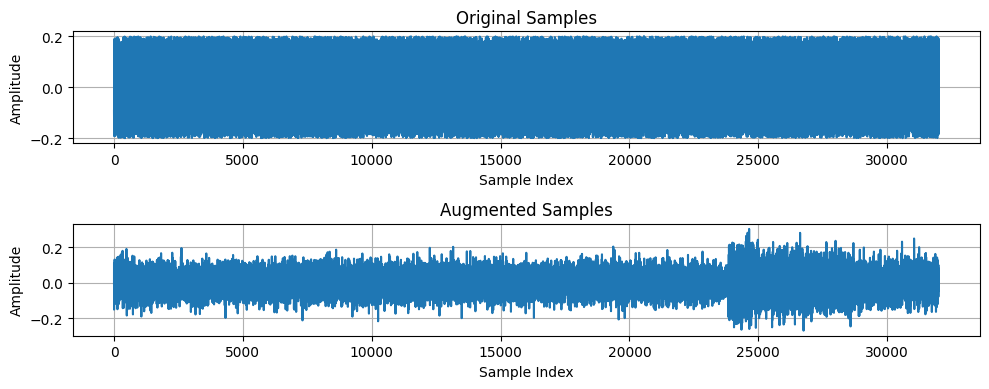

In [ ]:
#그래프와 오디오로 표현
import matplotlib.pyplot as plt
from IPython.display import Audio
import IPython.display as ipd

# Plot the original samples
plt.figure(figsize=(10, 4))
plt.subplot(2, 1, 1)
plt.title("Original Samples")
plt.plot(samples)
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.grid()
ipd.display(Audio(samples, rate=16000, normalize=False, autoplay=False))

# Plot the augmented samples
plt.subplot(2, 1, 2)
plt.title("Augmented Samples")
plt.plot(augmented_samples)
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.grid()
ipd.display(Audio(augmented_samples, rate=16000, normalize=False, autoplay=False))

plt.tight_layout()
plt.show()